# Tensorflow Simple FNN

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [ ]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [ ]:
# Example
import numpy as np
import tensorflow as tf

@tf.function
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [ ]:
@tf.function
def mul(a,b): # Not matrix multiplication, rather elementwise
  return a * b

def add(a,b):
  return a + b

a = tf.Variable([[5,6],[7,8]])
b = tf.Variable([[1,2],[3,4]])
c = tf.Variable([[-1,1],[0,5]])

y = add(c, mul(a,b))
print(y.numpy())

[[ 4 13]
 [21 37]]


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


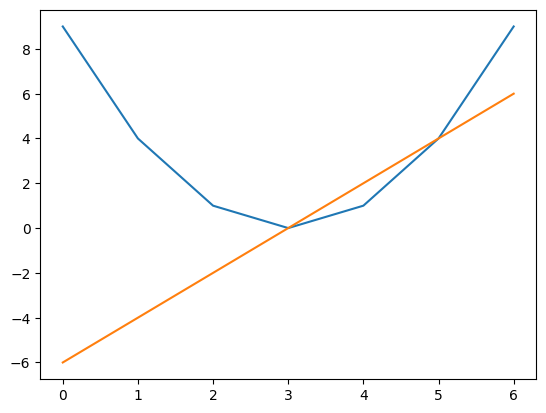

In [ ]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(f(x))
plt.plot(dfdx(x))

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

[0.04742587 0.11920292 0.26894143 0.5        0.7310586  0.880797
 0.95257413]
[0.04517666 0.10499358 0.19661194 0.25       0.19661194 0.10499357
 0.04517666]


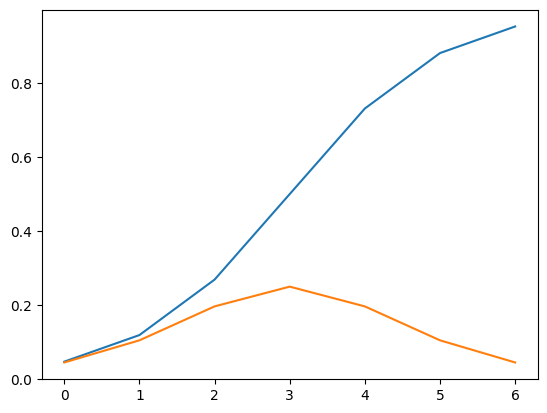

In [ ]:
@tf.function
def sigma(x):
  y = 1 / (1 + tf.exp(-x))
  return y

@tf.function
def dfdx(x):
  y = sigma(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(sigma(x).numpy())
print(dfdx(x).numpy())

plt.plot(sigma(x))
plt.plot(dfdx(x))

# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

In [ ]:
import tensorflow as tf

def g(x, y, sigma_squared):
    return tf.exp(-(x**2 + y**2) / (2 * sigma_squared))

sigma_squared = 0.5
x = tf.constant(1.0)
y = tf.constant(1.0)

# Use tf.GradientTape to calculate the gradient
with tf.GradientTape() as tape:
    tape.watch([x, y])  # Watch the variables with respect to which you want to compute the gradient
    z = g(x, y, sigma_squared)

# Calculate the gradient
grad_x, grad_y = tape.gradient(z, [x, y])

print("Gradient with respect to x:", grad_x.numpy())
print("Gradient with respect to y:", grad_y.numpy())

Gradient with respect to x: -0.27067056
Gradient with respect to y: -0.27067056


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Sem_2_Labs/CI_502/iris-enc.csv"

# Initialize a list to store the data
data = []

# Open the CSV file and read its contents
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        data.append(row)


In [5]:
data

[['5.1', '3.5', '1.4', '0.2', '0', '0', '1'],
 ['4.9', '3.0', '1.4', '0.2', '0', '0', '1'],
 ['4.7', '3.2', '1.3', '0.2', '0', '0', '1'],
 ['4.6', '3.1', '1.5', '0.2', '0', '0', '1'],
 ['5.0', '3.6', '1.4', '0.2', '0', '0', '1'],
 ['5.4', '3.9', '1.7', '0.4', '0', '0', '1'],
 ['4.6', '3.4', '1.4', '0.3', '0', '0', '1'],
 ['5.0', '3.4', '1.5', '0.2', '0', '0', '1'],
 ['4.4', '2.9', '1.4', '0.2', '0', '0', '1'],
 ['4.9', '3.1', '1.5', '0.1', '0', '0', '1'],
 ['5.4', '3.7', '1.5', '0.2', '0', '0', '1'],
 ['4.8', '3.4', '1.6', '0.2', '0', '0', '1'],
 ['4.8', '3.0', '1.4', '0.1', '0', '0', '1'],
 ['4.3', '3.0', '1.1', '0.1', '0', '0', '1'],
 ['5.8', '4.0', '1.2', '0.2', '0', '0', '1'],
 ['5.7', '4.4', '1.5', '0.4', '0', '0', '1'],
 ['5.4', '3.9', '1.3', '0.4', '0', '0', '1'],
 ['5.1', '3.5', '1.4', '0.3', '0', '0', '1'],
 ['5.7', '3.8', '1.7', '0.3', '0', '0', '1'],
 ['5.1', '3.8', '1.5', '0.3', '0', '0', '1'],
 ['5.4', '3.4', '1.7', '0.2', '0', '0', '1'],
 ['5.1', '3.7', '1.5', '0.4', '0',

In [6]:

# Convert data to a NumPy array and split it into features and labels
data = np.array(data, dtype=np.float32)
X = data[:, :4]  # Features
y = data[:, 4:7]   # Labels



In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
x_min = np.min(X, axis = 0)
x_max = np.max(X, axis = 0)
y_max = 1
y_min = 0

train_x_norm = np.zeros((X.shape[0],X.shape[1]))
for j in range(X.shape[1]):
  for i in range(len(X)):
    train_x_norm[i,j] = round(((y_max - y_min)/(x_max[j] - x_min[j]))*(X[i,j] - x_min[j]) + y_min,6)

In [9]:
train_x_norm

array([[0.222222, 0.625   , 0.067797, 0.041667],
       [0.166667, 0.416667, 0.067797, 0.041667],
       [0.111111, 0.5     , 0.050847, 0.041667],
       [0.083333, 0.458333, 0.084746, 0.041667],
       [0.194444, 0.666667, 0.067797, 0.041667],
       [0.305556, 0.791667, 0.118644, 0.125   ],
       [0.083333, 0.583333, 0.067797, 0.083333],
       [0.194444, 0.583333, 0.084746, 0.041667],
       [0.027778, 0.375   , 0.067797, 0.041667],
       [0.166667, 0.458333, 0.084746, 0.      ],
       [0.305556, 0.708333, 0.084746, 0.041667],
       [0.138889, 0.583333, 0.101695, 0.041667],
       [0.138889, 0.416667, 0.067797, 0.      ],
       [0.      , 0.416667, 0.016949, 0.      ],
       [0.416667, 0.833333, 0.033898, 0.041667],
       [0.388889, 1.      , 0.084746, 0.125   ],
       [0.305556, 0.791667, 0.050847, 0.125   ],
       [0.222222, 0.625   , 0.067797, 0.083333],
       [0.388889, 0.75    , 0.118644, 0.083333],
       [0.222222, 0.75    , 0.084746, 0.083333],
       [0.305556, 0.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, y, test_size=0.2, random_state=42)

# 120 rows for train, 30 rows for test

In [ ]:
# Standardize features (Z-score normalization, not needed here)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Encode labels (For 0 and 1 numerical encoding, not needed here)
# encoder = LabelEncoder()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),          # Input layer with 4 features
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer with 8 units and ReLU activation
    tf.keras.layers.Dense(3, activation='sigmoid')  # Output layer with 3 units (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=8)

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/1000
15/15 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.0167
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.0167
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.0167
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.0167
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.0167
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.0167
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.0167
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.0167
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.0083
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.0083

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming 'model' is your trained neural network model
y_pred = model.predict(X_test)  # Get predictions on the test data

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1) # Finds max value and return indices

# Convert true labels to class labels (if they are one-hot encoded)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix using TensorFlow
confusion = tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=3)

print("Confusion Matrix:")
print(confusion)


1/1 [==============================] - 0s 35ms/step
Confusion Matrix:
tf.Tensor(
[[11  0  0]
 [ 7  2  0]
 [ 0  0 10]], shape=(3, 3), dtype=int32)
